In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_DIR = 'E:\Projects\ASL'

In [7]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=VALIDATION_SPLIT,
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=VALIDATION_SPLIT,
    subset='validation',
    seed=123
)

Found 3132 files belonging to 29 classes.
Using 2506 files for training.
Found 3132 files belonging to 29 classes.
Using 626 files for validation.


In [9]:
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)
print(f"Detected {NUM_CLASSES} classes: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
], name="data_augmentation")


Detected 29 classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 366ms/step - accuracy: 0.0444 - loss: 3.4101 - val_accuracy: 0.0000e+00 - val_loss: 3.4021
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 343ms/step - accuracy: 0.0872 - loss: 3.1579 - val_accuracy: 0.2109 - val_loss: 2.9677
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 349ms/step - accuracy: 0.1959 - loss: 2.6365 - val_accuracy: 0.3898 - val_loss: 2.2066
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 352ms/step - accuracy: 0.3080 - loss: 2.2226 - val_accuracy: 0.3003 - val_loss: 2.5601
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 350ms/step - accuracy: 0.4015 - loss: 1.9076 - val_accuracy: 0.5112 - val_loss: 1.8026
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 341ms/step - accuracy: 0.4737 - loss: 1.6371 - val_accuracy: 0.4952 - val_loss: 1.6131
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 361ms/step - accuracy: 0.5558 - loss: 1.3424 - val_accuracy: 0.6262 - val_loss: 1.2818
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 371ms/step - accuracy: 0.6089 - loss: 1.1770 - val_

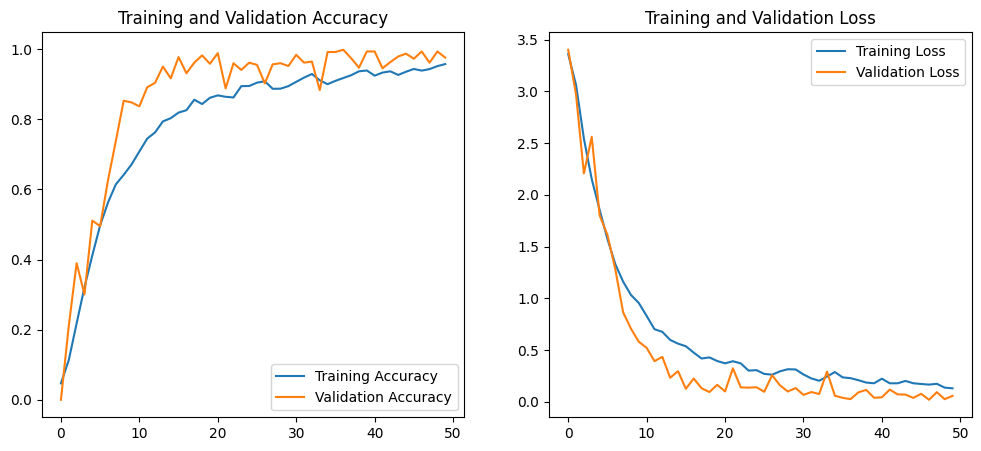

Model saved as 'ASL.keras'


In [10]:
model = Sequential([
    data_augmentation,
    Rescaling(1./255), 
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

EPOCHS = 50

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('ASL.keras')
print("Model saved as 'ASL.keras'")

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step

Predicted class: C
Confidence: 99.99%


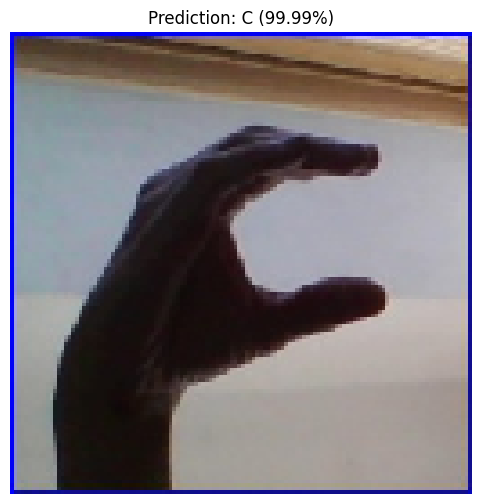

In [12]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\C_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

Predicted class: Q
Confidence: 100.00%


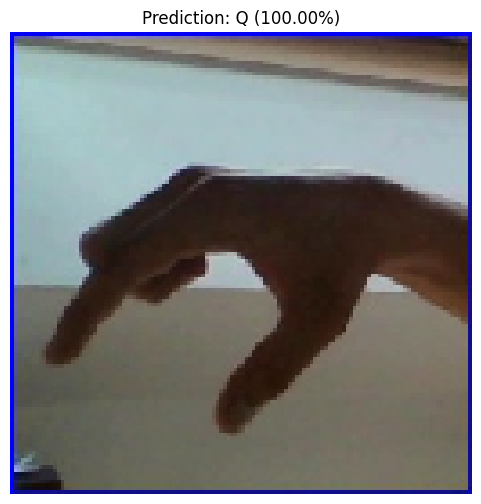

In [13]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\Q_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step

Predicted class: D
Confidence: 100.00%


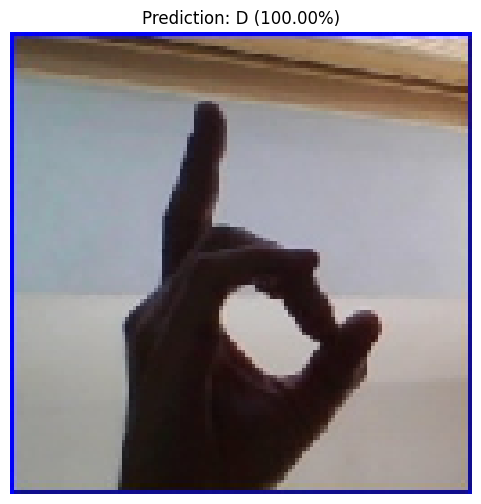

In [14]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\D_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

Predicted class: O
Confidence: 99.91%


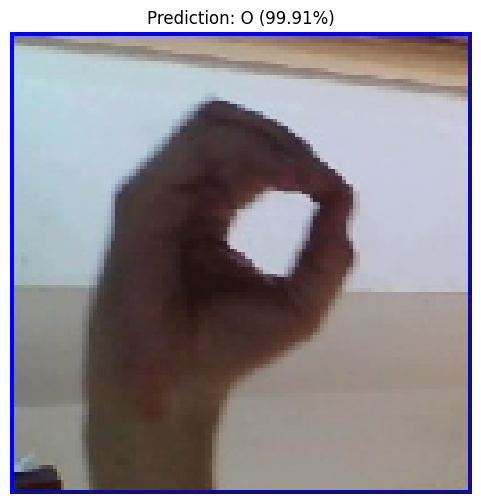

In [15]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\O_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step

Predicted class: I
Confidence: 88.23%


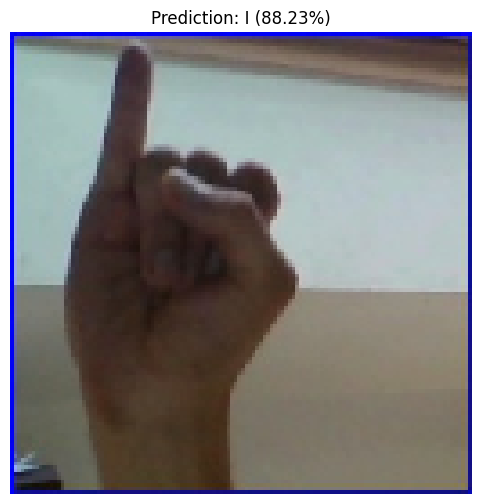

In [16]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\I_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

Predicted class: J
Confidence: 81.29%


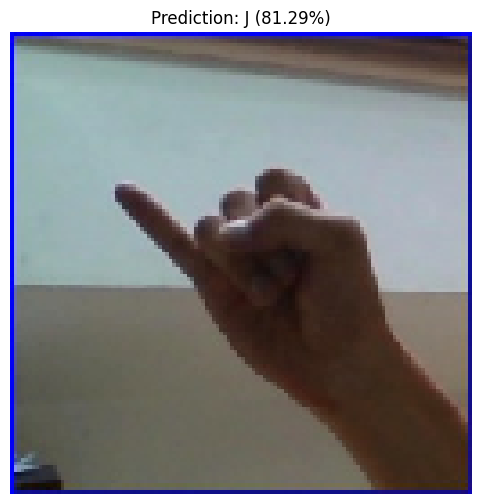

In [17]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\J_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step

Predicted class: K
Confidence: 100.00%


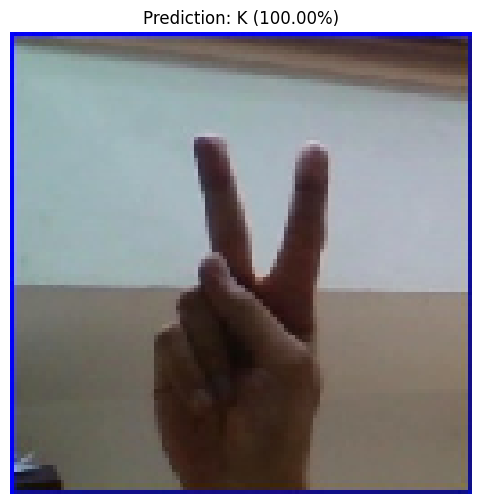

In [18]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\K_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

Predicted class: V
Confidence: 100.00%


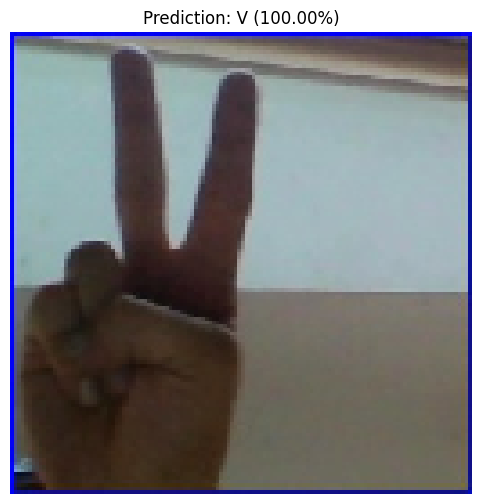

In [19]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\V_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step

Predicted class: Z
Confidence: 98.81%


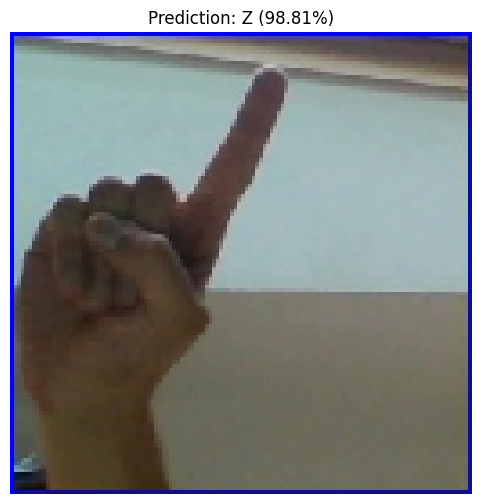

In [20]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\Z_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

Predicted class: M
Confidence: 100.00%


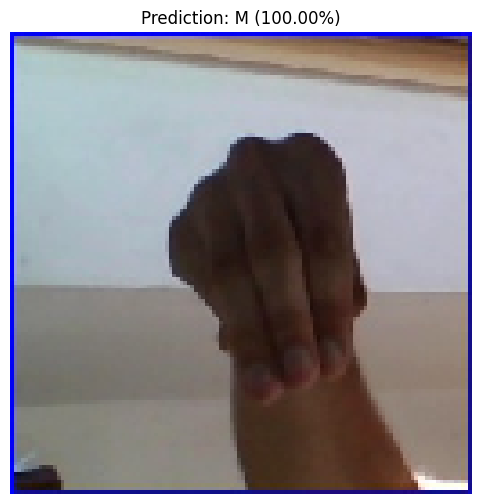

In [21]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\M_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

Predicted class: N
Confidence: 100.00%


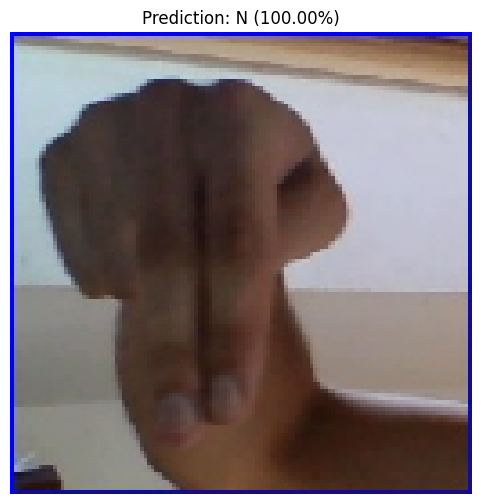

In [22]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ASL.keras' 
IMAGE_PATH = "E:\\Projects\\asl_alphabet_test\\asl_alphabet_test\\N_test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()